# Questão 1

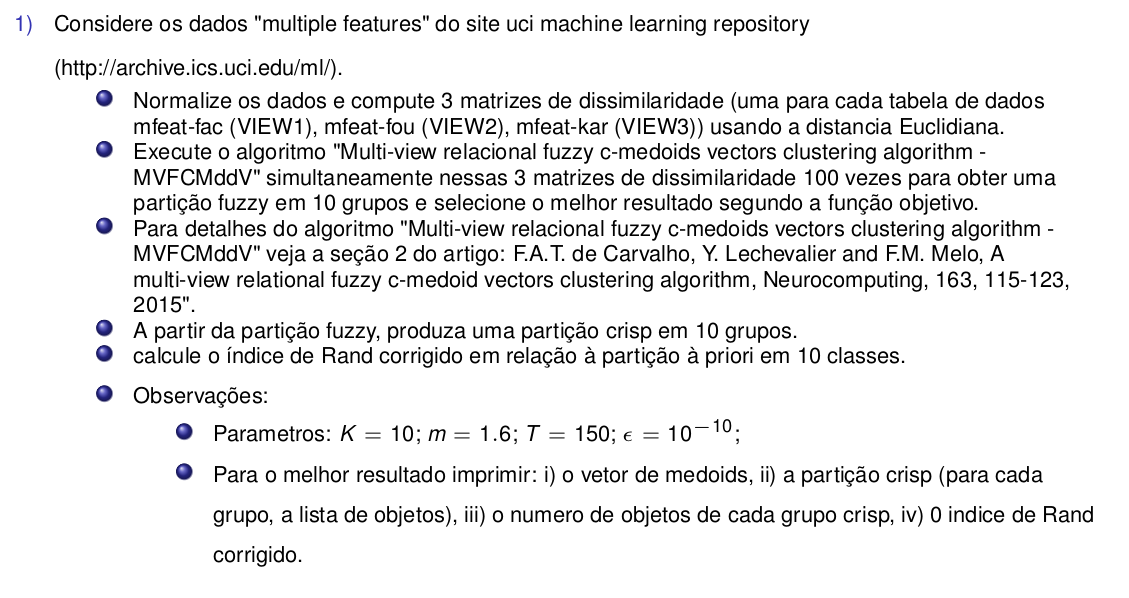

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn import preprocessing


#Carregamento de Arquivos
data_fac = np.recfromtxt('mfeat-fac')
data_fou = np.recfromtxt('mfeat-fou')
data_kar = np.recfromtxt('mfeat-kar')


print(data_fac.shape)
print(data_fou.shape)
print(data_kar.shape)

(2000, 216)
(2000, 76)
(2000, 64)


In [2]:
#Parametros
p = 3
K = 10
m = 1.6
T = 150
eps = 10**(-10)

Normalização dos dados

In [3]:
#Normalização para intervalo de 0<x<1
data_fac = preprocessing.normalize(data_fac)
data_fou = preprocessing.normalize(data_fou)
data_kar = preprocessing.normalize(data_kar)

Cálculo de Matriz de Dissimilaridade

In [4]:
def Dissimilarity(data):
    """Calcula distancia euclidiana entre pontos de uma matriz de dimensões
    nxp e retorna uma matriz de dimensões nxn"""
    
    x=np.zeros((len(data), len(data)))
    for i,x1 in enumerate(data):
        for j,x2 in enumerate(data):
            x[i,j]=np.array(np.linalg.norm(x1-x2))
    return x

In [5]:
import time
start = time.time()

diss_fac = Dissimilarity(data_fac)
diss_fou = Dissimilarity(data_fou)
diss_kar = Dissimilarity(data_kar)

end = time.time()
print((end - start)/60)

7.202581493059794


In [6]:
D_matrices = [diss_fac, diss_fou, diss_kar]

### Algoritimo "Multi-view relacional fuzzy c-medoids vectors clustering algorithm-MVFCMddV"

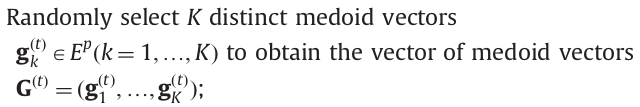

In [7]:
#Inicialização dos protótipos
np.random.seed(42)
G_matrices = [np.random.randint(1,K,diss_fac.shape[1]) for i in range(p)]

Matriz de peso

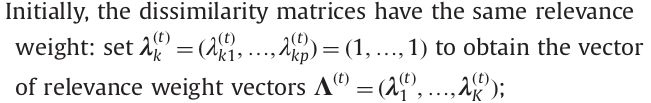

In [12]:
#Inicialização dos pesos
rel_weight = [np.ones((p,K), dtype=np.float16)]

Cálculo de Membership

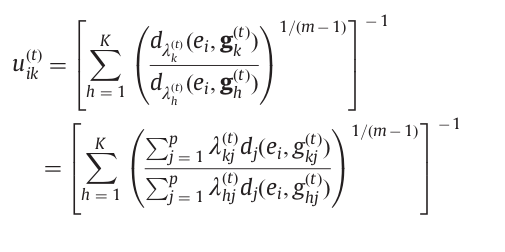